The maximum DinitzMaxFlow flow from S to T is: 19
The maximum FordFulkersonMaxFlow flow from S to T is: 19
The maximum EdmondsKarpMaxFlow flow from S to T is: 19
The maximum flow with mxlibrary(fordkubel) from S to T is: 19


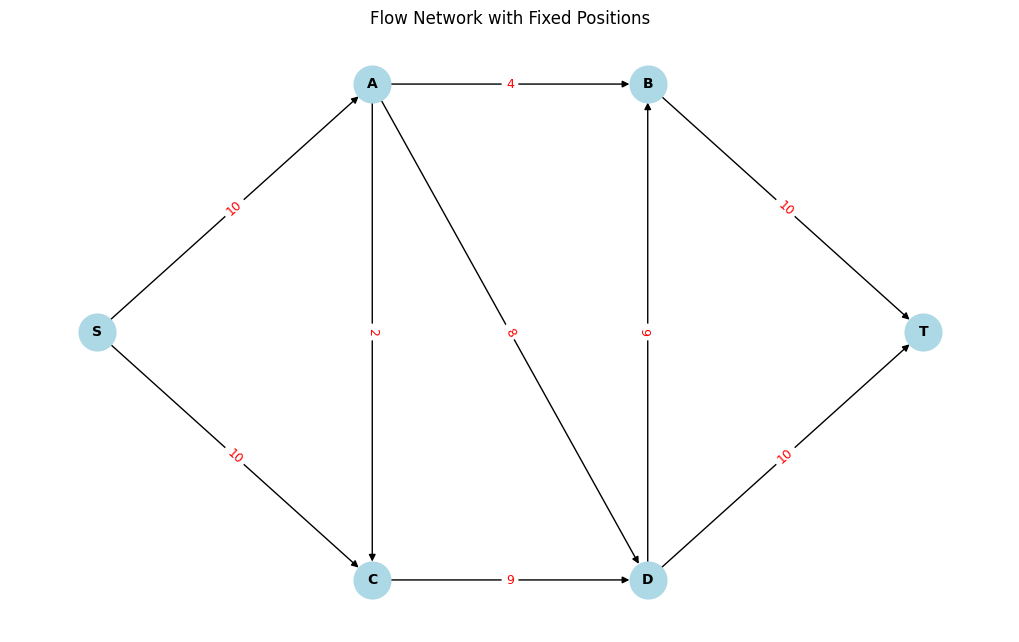

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
import maximum_flow
from collections import defaultdict
 
# Define the graph as shown in the image
graph = {
    'S': {'A': {'capacity': 10}, 'C': {'capacity': 10}},
    'A': {'B': {'capacity': 4}, 'C': {'capacity': 2}, 'D': {'capacity': 8}},
    'B': {'T': {'capacity': 10}},
    'C': {'D': {'capacity': 9}},
    'D': {'B': {'capacity': 6}, 'T': {'capacity': 10}},
    'T': {}
}

# Define source and sink
source = 'S'
sink = 'T'

# Create the directed graph with capacities
G = nx.DiGraph()
for u in graph:
    for v, data in graph[u].items():
        capacity = data['capacity']
        G.add_edge(u, v, capacity=capacity)

# Set fixed positions for each node to match the layout in the image
fixed_positions = {
    'S': (0, 1),
    'A': (1, 2),
    'B': (2, 2),
    'C': (1, 0),
    'D': (2, 0),
    'T': (3, 1)
}
# Initialize the DinitzMaxFlow algorithm with the graph, source, and sink
dinitz = maximum_flow.DinitzMaxFlow(graph, source, sink)

# Calculate the maximum flow
max_flow_value = dinitz.max_flow()
print(f"The maximum DinitzMaxFlow flow from {source} to {sink} is: {max_flow_value}")

ford = maximum_flow.FordFulkersonMaxFlow(graph, source, sink)

# Calculate the maximum flow
max_flow_value = ford.max_flow()
print(f"The maximum FordFulkersonMaxFlow flow from {source} to {sink} is: {max_flow_value}")

edmonds = maximum_flow.EdmondsKarpMaxFlow(graph, source, sink)

# Calculate the maximum flow
max_flow_value = edmonds.max_flow()
print(f"The maximum EdmondsKarpMaxFlow flow from {source} to {sink} is: {max_flow_value}")
# Plot the graph with fixed positions

max_flow_value, flow_dict = nx.maximum_flow(G, source, sink)

print(f"The maximum flow with mxlibrary(fordkubel) from {source} to {sink} is: {max_flow_value}")

plt.figure(figsize=(10, 6))


nx.draw(G, fixed_positions, with_labels=True, node_size=700, node_color="lightblue", font_size=10, font_weight="bold")
edge_labels = {(u, v): f"{data['capacity']}" for u, v, data in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, fixed_positions, edge_labels=edge_labels, font_size=9, font_color="red")

plt.title("Flow Network with Fixed Positions")
plt.show()


The maximum DinitzMaxFlow flow from S to T is: 28
time: 0.0015700198709964752
The maximum FordFulkersonMaxFlow flow from S to T is: 28
time: 0.0007562637329101562
The maximum EdmondsKarpMaxFlow flow from S to T is: 28
time: 0.0007659401744604111
{'S': {'A': 10, 'B': 5, 'C': 13}, 'A': {'B': 0, 'D': 9, 'E': 1}, 'B': {'C': 0, 'E': 8}, 'C': {'F': 13}, 'D': {'E': 0, 'T': 9}, 'E': {'F': 0, 'T': 9}, 'F': {'B': 3, 'T': 10}, 'T': {}}
The maximum flow with mxlibrary(fordkubel) from S to T is: 28


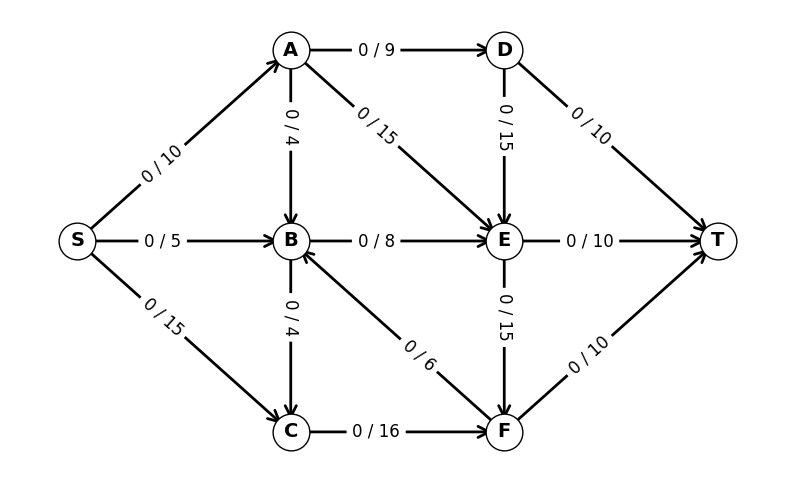

In [12]:
import matplotlib.pyplot as plt
import networkx as nx
import time
# Initialize the directed graph
G = nx.DiGraph()

# Define nodes with fixed positions for layout
pos = {
    'S': (0, 2), 'A': (1, 4), 'B': (1, 2), 'C': (1, 0),
    'D': (2, 4), 'E': (2, 2), 'F': (2, 0), 'T': (3, 2)
}

# Define edges with capacities
edges = {
    ('S', 'A'): 10, ('S', 'B'): 5, ('S', 'C'): 15,
    ('A', 'B'): 4, ('A', 'D'): 9,('A', 'E'): 15,
    ('B', 'C'): 4, ('B', 'E'): 8,
    ('C', 'F'): 16,
    ('D', 'E'): 15, ('D', 'T'): 10,
    ('E', 'F'): 15, ('E', 'T'): 10,
    ('F', 'B'): 6, ('F', 'T'): 10
}
source, sink = 'S', 'T'
# Add nodes and edges with capacities
for (u, v), capacity in edges.items():
    G.add_edge(u, v, capacity=capacity)
# Initialize the DinitzMaxFlow algorithm with the graph, source, and sink
start = time.perf_counter()
dinitz = maximum_flow.DinitzMaxFlow(G, source, sink)

# Calculate the maximum flow
max_flow_value = dinitz.max_flow()
print(f"The maximum DinitzMaxFlow flow from {source} to {sink} is: {max_flow_value}")
print(f"time: {time.perf_counter()-start}")
start = time.perf_counter()

ford = maximum_flow.FordFulkersonMaxFlow(G, source, sink)

# Calculate the maximum flow
max_flow_value = ford.max_flow()
print(f"The maximum FordFulkersonMaxFlow flow from {source} to {sink} is: {max_flow_value}")
print(f"time: {time.perf_counter()-start}")
start = time.perf_counter()

edmonds = maximum_flow.EdmondsKarpMaxFlow(G, source, sink)

# Calculate the maximum flow
max_flow_value = edmonds.max_flow()
print(f"The maximum EdmondsKarpMaxFlow flow from {source} to {sink} is: {max_flow_value}")
print(f"time: {time.perf_counter()-start}")
# Plot the graph with fixed positions

max_flow_value, flow_dict = nx.maximum_flow(G, source, sink)
print(flow_dict)
print(f"The maximum flow with mxlibrary(fordkubel) from {source} to {sink} is: {max_flow_value}")
# Draw the graph
plt.figure(figsize=(10, 6))
nx.draw_networkx_nodes(G, pos, node_size=700, node_color="white", edgecolors="black")
nx.draw_networkx_edges(G, pos, width=2, arrowstyle="->", arrowsize=20)
nx.draw_networkx_labels(G, pos, font_size=14, font_weight="bold")

# Draw edge labels with capacities
edge_labels = {(u, v): f"0 / {d['capacity']}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12, label_pos=0.6)

plt.axis("off")
plt.show()


In [9]:
G_fixed = nx.DiGraph()

# Define positions for layout (fixed positions)
pos_fixed = {
    'S': (0, 2), 'A': (1, 4), 'B': (1, 2), 'C': (1, 0),
    'D': (2, 4), 'E': (2, 2), 'F': (2, 0), 'T': (3, 2)
}

# Define edges with capacities for the fixed graph
edges_fixed = {
    ('S', 'A'): 10, ('S', 'B'): 5, ('S', 'C'): 15,
    ('A', 'B'): 4, ('A', 'D'): 9, ('A', 'E'): 15,
    ('B', 'C'): 4, ('B', 'E'): 8,
    ('C', 'F'): 16,
    ('D', 'E'): 15, ('D', 'T'): 10,
    ('E', 'F'): 15, ('E', 'T'): 10,
    ('F', 'T'): 10, ('F', 'B'): 6
}

# Add nodes and edges with capacities to the graph
for (u, v), capacity in edges_fixed.items():
    G_fixed.add_edge(u, v, capacity=capacity)



class FordFulkersonMaxFlowWithSteps:
    def __init__(self, graph, source, sink):
        self.graph = graph
        self.source = source
        self.sink = sink
        self.flow = defaultdict(lambda: defaultdict(int))  # Dictionary to track flow on each edge

    def bfs(self):
        """BFS to find an augmenting path with available capacity."""
        parent = {self.source: None}  # Track the path with parent nodes
        queue = deque([self.source])
        
        while queue:
            u = queue.popleft()
            
            for v, capacity in self.graph[u].items():
                residual_capacity = capacity['capacity'] - self.flow[u][v]
                # Only proceed if there's residual capacity and v has not been visited
                if residual_capacity > 0 and v not in parent:
                    parent[v] = u
                    if v == self.sink:  # If we've reached the sink
                        return parent
                    queue.append(v)
        
        return None  # No augmenting path found

    def max_flow(self):
        """Calculate max flow using Ford-Fulkerson with BFS and print each step."""
        max_flow_value = 0
        step = 1  # Step counter for debugging output
        
        while True:
            print(f"\nStep {step}: Searching for augmenting path")
            parent = self.bfs()
            if not parent:  # No more augmenting paths
                print("No more augmenting paths found.")
                break
            
            # Find the maximum flow through the path found
            path_flow = float('Inf')
            s = self.sink
            path = []  # Track the path for printing purposes
            while s != self.source:
                u = parent[s]
                path_flow = min(path_flow, self.graph[u][s]['capacity'] - self.flow[u][s])
                path.append((u, s))
                s = u
            
            path.reverse()  # Reverse to show path from source to sink
            print(f"Augmenting path found: {path} with flow = {path_flow}")

            # Update residual capacities and reverse edges
            v = self.sink
            while v != self.source:
                u = parent[v]
                self.flow[u][v] += path_flow
                self.flow[v][u] -= path_flow
                print(f"Updated flow on edge ({u}, {v}): {self.flow[u][v]} / {self.graph[u][v]['capacity']}")
                v = u
            
            max_flow_value += path_flow  # Add path flow to overall flow
            print(f"Total flow after step {step}: {max_flow_value}")
            step += 1
        
        print(f"\nMaximum flow from {self.source} to {self.sink} is {max_flow_value}")
        return max_flow_value

# Instantiate and calculate max flow with step-by-step output
ford_fulkerson_with_steps_solver = FordFulkersonMaxFlowWithSteps(G_fixed, 'S', 'T')
maximum_flow_with_steps = ford_fulkerson_with_steps_solver.max_flow()
maximum_flow_with_steps



Step 1: Searching for augmenting path
Augmenting path found: [('S', 'A'), ('A', 'D'), ('D', 'T')] with flow = 9
Updated flow on edge (D, T): 9 / 10
Updated flow on edge (A, D): 9 / 9
Updated flow on edge (S, A): 9 / 10
Total flow after step 1: 9

Step 2: Searching for augmenting path
Augmenting path found: [('S', 'A'), ('A', 'E'), ('E', 'T')] with flow = 1
Updated flow on edge (E, T): 1 / 10
Updated flow on edge (A, E): 1 / 15
Updated flow on edge (S, A): 10 / 10
Total flow after step 2: 10

Step 3: Searching for augmenting path
Augmenting path found: [('S', 'B'), ('B', 'E'), ('E', 'T')] with flow = 5
Updated flow on edge (E, T): 6 / 10
Updated flow on edge (B, E): 5 / 8
Updated flow on edge (S, B): 5 / 5
Total flow after step 3: 15

Step 4: Searching for augmenting path
Augmenting path found: [('S', 'C'), ('C', 'F'), ('F', 'T')] with flow = 10
Updated flow on edge (F, T): 10 / 10
Updated flow on edge (C, F): 10 / 16
Updated flow on edge (S, C): 10 / 15
Total flow after step 4: 25

St

28